<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Experiment 1: SS/DS Diffraction
Kaimi Kahihikolo & Colleen Lau
Exp. Conducted: 16 Feb 2017

# Preamble

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from pylab import rcParams


# Directories

In [2]:
main_dir = "/Volumes/FLASH/PHYS274L/Lab1/"
output_dir = main_dir

# Constants/ Measurements

In [3]:
raw_v = 3.2 #speed of track [cm / min]
v = raw_v * 0.01 / 60.0 ## converted to [m / s]
d_v = 0.0016/100.0
wavelength = 632e-9 ## Wavelength of laser [m]
#delta_t = 0.05 ## [s]
delta_t = 0.2

    ## --- SS 2mm stuff:
slit_width_2mm = 0.2/1000.0 ##slit width in [m]
d_slit_width_2mm = 0.00001
L_2mm = 1.165 ## Separation [m]
dL_2mm = 0.002 ##Error in sep [m]

    ## --- SS 4mm stuff:
slit_width_4mm = 0.4/1000.0 ##slit width in [m]
d_slit_width_4mm = 0.00001
L_4mm = 1.205 ## Separation [m]
dL_4mm = 0.002 ##Error in sep [m]

    ## --- Double Slit
L_DS = 1.176 
#L_DS = 1.7
dL_DS = 0.1/100.0
d_theo = 0.6 ## theoretical slit separation mm

# Error Functions

In [4]:
## --- Error Propagation
def theta_err(sep, sep_err, y, t_err, velocity):
    yerr = (velocity * t_err / 2.0)
    return np.sqrt(((sep**2 * yerr)/(sep**2+y**2)**(3/2))**2
                   +((sep*y*sep_err)/(sep**2+y**2)**(3/2))**2)

def slit_sep_err(wavelen, sep, sep_err, slope, slope_err):
    return np.sqrt((wavelen*sep_err/slope)**2+
                   (-wavelen*sep*slope_err/slope**2)**2)
    
    
    ## --- Weighted Linear Regression
def wlinear_fit (x,y,w) :
    W = np.sum(w)
    wm_x = np.average(x,weights=w)
    wm_y = np.average(y,weights=w)
    dx = x-wm_x
    dy = y-wm_y
    wm_dx2 = np.average(dx**2,weights=w)
    wm_dxdy = np.average(dx*dy,weights=w)
    # In terms of y = a + b x
    b = wm_dxdy / wm_dx2
    a = wm_y - wm_x*b
    cov_00 = (1.0/W) * (1.0 + wm_x**2/wm_dx2)
    cov_11 = 1.0 / (W*wm_dx2)
    cov_01 = -wm_x / (W*wm_dx2)
    # Compute chi^2 = \sum w_i (y_i - (a + b * x_i))^2
    chi2 = np.sum (w * (y-(a+b*x))**2)
    return a,b,cov_00,cov_11,cov_01,chi2


# Single Slit ( 0.2 [mm] ) Analyses

	 Single Slit 0.2 mm Calculations


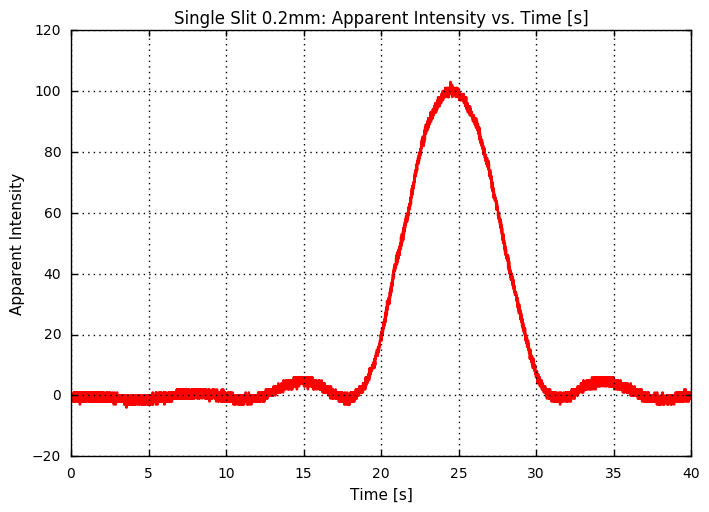

Theoretical: 3.6814 +/- 0.184178465897 [mm]
Experimental: 3.62826666667 +/- 0.121211928243 [mm]


In [289]:
plt.clf()
print("\t Single Slit 0.2 mm Calculations")
    
    ## --- Loading Data
SS_2mm_intensity = np.genfromtxt(main_dir+"ALL0138/A0138CH1.CSV", 
                                 delimiter=',', usecols=(0))

time_range = np.arange(0, len(SS_2mm_intensity)*0.01, 0.01)

    ## --- Plotting
plt.plot(time_range, SS_2mm_intensity, 'r')
plt.title("Single Slit 0.2mm: Apparent Intensity vs. Time [s]")
plt.ylabel("Apparent Intensity")
plt.xlabel("Time [s]")
plt.style.use('seaborn-notebook')
plt.xlim(0,40)
plt.grid()
plt.show()
    
    ## --- Theoretica Theta
    ## Recall: a sin\theta = m\lambda\Rightarrow\theta = m\lambda/a
#theta_theo_2mm = 1.0*wavelength/(slit_width_2mm)
#pos_theo_2mm = (L_2mm * theta_theo_2mm) / (theta_theo_2mm**2-1)**(0.5)
#pos_theo_2mm = theta_theo_2mm*L_2mm
pos_theo_2mm = L_2mm * wavelength / slit_width_2mm
#d_pos_theo_2mm = np.sqrt((wavelength*dL_2mm/slit_width_2mm)**2+(d_slit_width_2mm*wavelength/(slit_width_2mm**2))**2)

d_pos_theo_2mm = np.sqrt((wavelength*dL_2mm/slit_width_2mm)**2+
            (d_slit_width_2mm*wavelength*L_2mm/(slit_width_2mm**2))**2)
#theta = y/ \sqrt(y^2 + L^2) => theta^2 = y^2 / (y^2 + L^2) = theta^2 (y^2 + L^2) = y^2 =>  
##print("Theoretical Theta: %s [rad]") %theta_theo_2mm

print("Theoretical: %s +/- %s [mm]") %(pos_theo_2mm*1000.0, d_pos_theo_2mm*1000.0)


    ## --- Experimental Separation
Delta_T_2mm = 13.606 ## Distance between m=-1 & 1 [s]
d_2mm = v * Delta_T_2mm 
y_2mm = d_2mm/2.0 ## Vertical distance
#theta_exp_2mm = y_2mm / np.sqrt((y_2mm**2 + L_2mm**2))
y_err = np.sqrt((v*delta_t/2.0)**2+(Delta_T_2mm*d_v/2.0)**2)

print("Experimental: %s +/- %s [mm]") %(y_2mm*1000.0, (y_err*1000.0))
##delta_theta_exp_2mm = theta_err(L_2mm, dL_2mm, y_2mm, delta_t, v)
##print("Experimental Theta = (%s +/- %s)") %(theta_exp_2mm, 
                                            #delta_theta_exp_2mm)
## Perhaps try delta a = 0.02 mm

# Single Slit ( 0.4 [mm] ) Analyses

	 Single Slit 0.4 mm Calculations


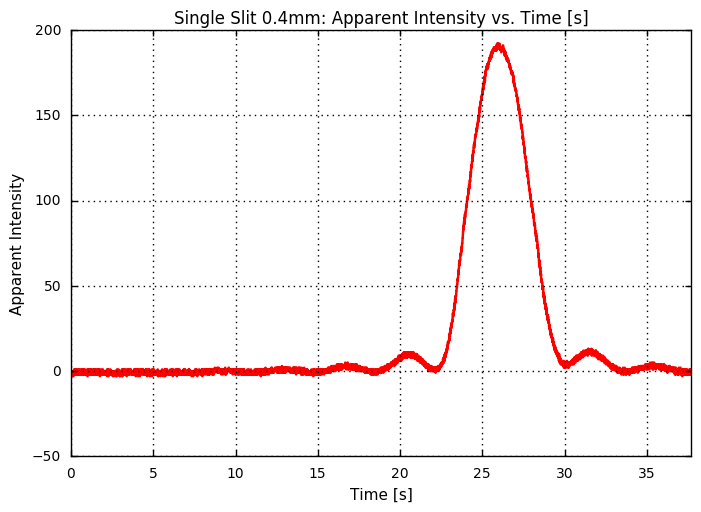

Theoretical: 1.9039 +/- 0.0477022809334
Experimental: 2.12533333333 +/- 0.121211928243


In [290]:
plt.clf()
print("\t Single Slit 0.4 mm Calculations")
    
    ## --- Loading Data
SS_4mm_intensity = np.genfromtxt(main_dir+"ALL0141/A0141CH1.CSV", 
                                 delimiter=',', usecols=(0))

time_range = np.arange(0, len(SS_4mm_intensity)*0.01, 0.01)

    ## --- Plotting
plt.plot(time_range, SS_4mm_intensity, 'r')
plt.title("Single Slit 0.4mm: Apparent Intensity vs. Time [s]")
plt.ylabel("Apparent Intensity")
plt.xlabel("Time [s]")
plt.style.use('seaborn-notebook')
plt.xlim(0,max(time_range))
plt.grid()
plt.show()
    
    ## --- Theoretica Theta
    ## Recall: a sin \theta = m \lambda \Rightarrow \theta = m\lambda / a
#theta_theo_4mm = 1.0*wavelength/(slit_width_4mm)
#pos_theo_4mm = theta_theo_4mm*L_4mm
pos_theo_4mm = L_4mm * wavelength / slit_width_4mm
d_pos_theo_4mm = np.sqrt((wavelength*dL_4mm/slit_width_4mm)**2+
            (d_slit_width_4mm*wavelength*L_4mm/(slit_width_4mm**2))**2)

print("Theoretical: %s +/- %s") %(pos_theo_4mm*1000.0, d_pos_theo_4mm*1000.0)

##print("Theoretical Theta for 4mm Slit: %s [rad]") %theta_theo_4mm

    ## --- Experimental Saperation
Delta_T_4mm = 7.97 ## Distance between m=-1 & 1 [s]
d_4mm = v * Delta_T_4mm 
y_4mm = d_4mm/2.0 ## Vertical distance
y_err = np.sqrt((v*delta_t/2.0)**2+(Delta_T_2mm*d_v/2.0)**2)

print("Experimental: %s +/- %s") %(y_4mm*1000.0, (y_err*1000.0) )
##print("m=1 is %s [m] from m=0, approx %s [mm]") %(y_4mm, y_4mm*1000)

##theta_exp_4mm = y_4mm / np.sqrt((y_4mm**2 + L_4mm**2))
##delta_theta_exp_4mm = theta_err(L_4mm, dL_4mm, y_4mm, delta_t, v)
##print("Experimental Theta = (%s +/- %s) [rad]") %(theta_exp_4mm, 
                                                  #delta_theta_exp_4mm)



# Double Slit Analyses

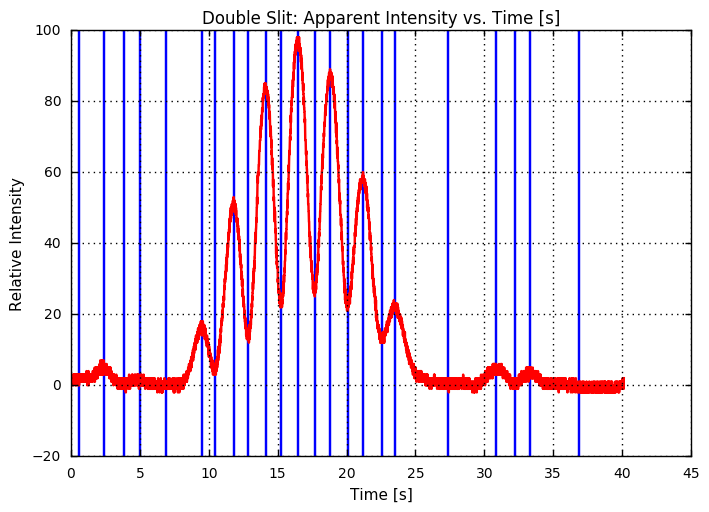

y = (0.00126425872664 +/- 0.000942573427673 ) (x) + (1.57591324338e-05 +/- 0.00379671103916)
Separation, d, approx. 0.587879667619 +/- 0.438296451593[mm]
Approximately -0.0276532751671 \sigma away from theory.


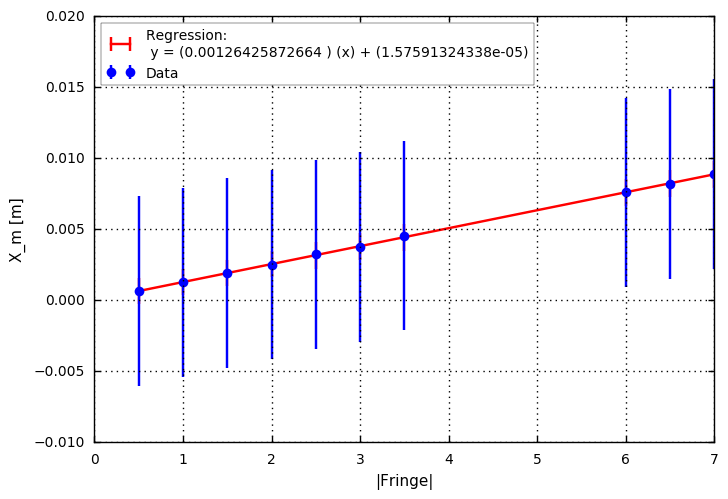

In [251]:
#'''
plt.clf()
DS_intensity = np.genfromtxt(main_dir+"ALL0136/A0136CH1.CSV", 
                             delimiter=',', usecols=(0))

time_range = np.arange(0, len(DS_intensity)*0.01, 0.01)

    ## --- Min/Max Locations
#loc = ([1.47874, 2.3745, 8.06192, 9.50407, 10.4396, 11.8096, 12.8659,
#        14.115, 15.2598, 16.4589, 17.6698, 18.827, 20.0799, 21.1979, 
#        22.5546, 23.5305, 25.1103, 30.8524, 32.2111, 33.2891, 34.5241])
#loc = ([0.550391, 2.37129, 3.86702, 5.01592, 6.90185, 9.50313, 
#        10.4461, 11.8226, 12.874, 14.1204, 15.2526, 16.4648, 
#        17.6708, 18.8235, 20.0789, 21.1776, 22.5843, 23.5011, 27.3935,
        30.831, 32.2212, 33.3025, 36.8681])

for z in loc:
    plt.axvline(x=z, color='b')
    
plt.plot(time_range, DS_intensity, 'red')
plt.title("Double Slit: Apparent Intensity vs. Time [s]")
plt.ylabel("Relative Intensity")
plt.xlabel("Time [s]")
plt.style.use('seaborn-notebook')
plt.grid()
plt.show()

    ## --- Linear Regression Section
    
    ## --- Loading Mins and Maxs
raw_data = np.genfromtxt(main_dir+"DS_max_2.txt", delimiter=',')

mag = raw_data[:,0]
time = raw_data[:,1]
dt = raw_data[:,2]

    ## --- Fit the Linear Regression and Produce Error

a,b,cov_00,cov_11,cov_01,chi2 = wlinear_fit(mag, time*v , 1.0/(dt/15.0)**2)
plt.errorbar(mag, (b*mag)+a, color='r', yerr=np.sqrt(cov_11), 
             label="Regression: \n y = ("+str(b)+" ) (x) + ("+str(a)+")")
plt.errorbar(mag, time*v, yerr=dt/15.0, fmt="o", label="Data")

plt.style.use('seaborn-notebook')

plt.ylabel("X_m [m]")
plt.xlabel("|Fringe|")
#plt.xlim(0, 7)
plt.grid()

plt.legend(loc=2)

## --- Print Linear regression equation and errors
print("y = ("+str(b)+" +/- "+str(np.sqrt(cov_11))+" ) (x) + ("
      +str(a)+" +/- "+str(np.sqrt(cov_00))+")")

#b = 0.126/100.0

slit_sep = wavelength * L_DS / b
d_slit_sep = slit_sep_err(wavelength, L_DS, dL_DS, b, np.sqrt(cov_11))

## --- Print Slit separation, d
##print("Slits are %s [m] apart +/- %s, approx. %s +/- %s[mm]")%(slit_sep,
                                                        #d_slit_sep,
                                                      # slit_sep*1000,
                                                      # d_slit_sep*1000)
print("Separation, d, approx. %s +/- %s[mm]")%(slit_sep*1000, d_slit_sep*1000)
## --- Compare

sigma_diff = (slit_sep*1000 - d_theo)/(d_slit_sep*1000)

print("Approximately %s \sigma away from theory.") %(sigma_diff)

## Remeasure mag = +/- 4
#'''

In [242]:
np.sqrt(cov_11)

0.0075883397182982277

In [243]:
print time*v

[ 0.00064267  0.00125653  0.00192373  0.00250355  0.00323067  0.00374038]


In [244]:
print b

0.00125434571271


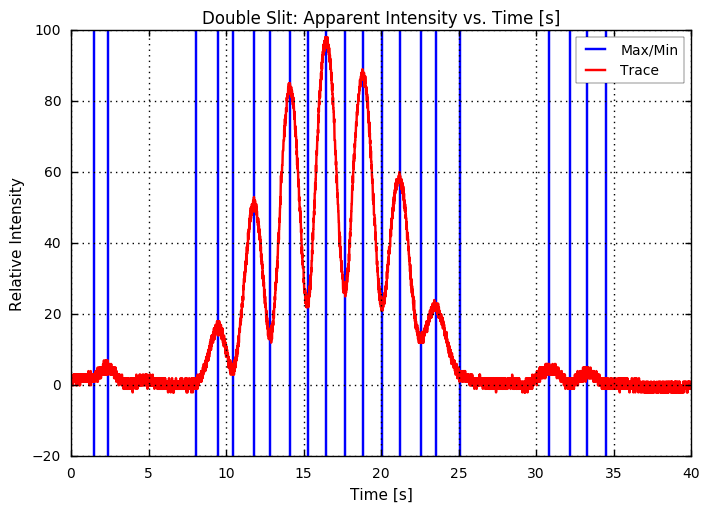

Separation, d, approx. 0.592525643027 +/- 0.0354319519549[mm]
Approximately -0.210949624869 \sigma away from theory.


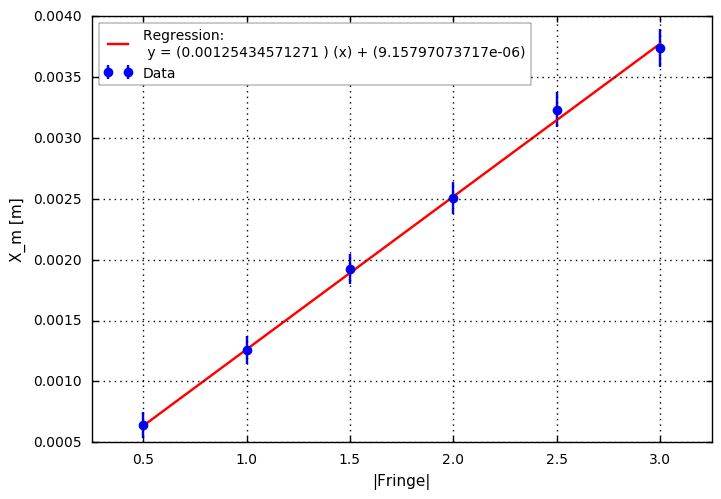

In [269]:
plt.clf()
DS_intensity = np.genfromtxt(main_dir+"ALL0136/A0136CH1.CSV", 
                             delimiter=',', usecols=(0))

time_range = np.arange(0, len(DS_intensity)*0.01, 0.01)

    ## --- Min/Max Locations
loc = ([1.47874, 2.3745, 8.06192, 9.50407, 10.4396, 11.8096, 12.8659,
        14.115, 15.2598, 16.4589, 17.6698, 18.827, 20.0799, 21.1979, 
        22.5546, 23.5305, 25.1103, 30.8524, 32.2111, 33.2891, 34.5241])


for z in range(len(loc)):
    plt.axvline(x=loc[z], color='b', label="Max/Min" if z==0 else "")
    
plt.plot(time_range, DS_intensity, 'r', label="Trace")
plt.title("Double Slit: Apparent Intensity vs. Time [s]")
plt.ylabel("Relative Intensity")
plt.xlabel("Time [s]")
plt.style.use('seaborn-notebook')
plt.grid()
plt.xlim(0,40)
plt.legend()
plt.show()

    ## --- Linear Regression Section
plt.clf()
    
    ## --- Loading Mins and Maxs
raw_data = np.genfromtxt(main_dir+"DS_max_5.txt", delimiter=',')

mag = raw_data[:,0]
time = raw_data[:,1]
y_DS = time * v
d_y_DS = np.sqrt((v*delta_t)**2+(time*d_v)**2)
dt = raw_data[:,2]

    ## --- Fit the Linear Regression and Produce Error

fit = np.polyfit(mag, time*v, w=1.0/dt, deg=1, full=False)
b = fit[0]
a = fit[1]

#a,b,cov_00,cov_11,cov_01,chi2 = wlinear_fit(mag, time*v , 1.0/(dt/10.0)**2)
plt.plot(mag, (b*mag)+a, color='red',
             label="Regression: \n y = ("+str(b)+" ) (x) + ("+str(a)+")")
plt.errorbar(mag, y_DS, yerr=d_y_DS, fmt="o", label="Data")

plt.style.use('seaborn-notebook')

plt.ylabel("X_m [m]")
plt.xlabel("|Fringe|")
plt.xlim(0.25, 3.25)
plt.grid()

plt.legend(loc=2)

## --- Print Linear regression equation and errors
#print("y = ("+str(b)+" +/- "+str(0.0075883397)+" ) (x) + ("
#      +str(a)+" +/- "+str(np.sqrt(cov_00))+")")

#b = 0.126/100.0

slit_sep = wavelength * L_DS / b
d_slit_sep = slit_sep_err(wavelength, L_DS, dL_DS, b, 0.000075)

## --- Print Slit separation, d
##print("Slits are %s [m] apart +/- %s, approx. %s +/- %s[mm]")%(slit_sep,
                                                        #d_slit_sep,
                                                      # slit_sep*1000,
                                                      # d_slit_sep*1000)
print("Separation, d, approx. %s +/- %s[mm]")%(slit_sep*1000.0, d_slit_sep*1000.0)
## --- Compare

sigma_diff = (slit_sep*1000.0 - d_theo)/(d_slit_sep*1000.0)

print("Approximately %s \sigma away from theory.") %(sigma_diff)

## Remeasure mag = +/- 4

In [246]:
print a

9.15797073717e-06


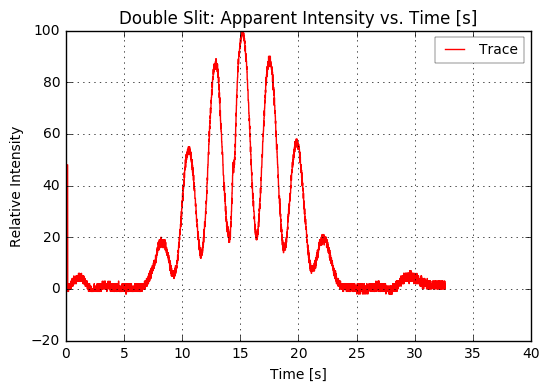

Separation, d, approx. 0.587879667619 +/- 0.0348785445997[mm]
Approximately -0.347501093288 \sigma away from theory.


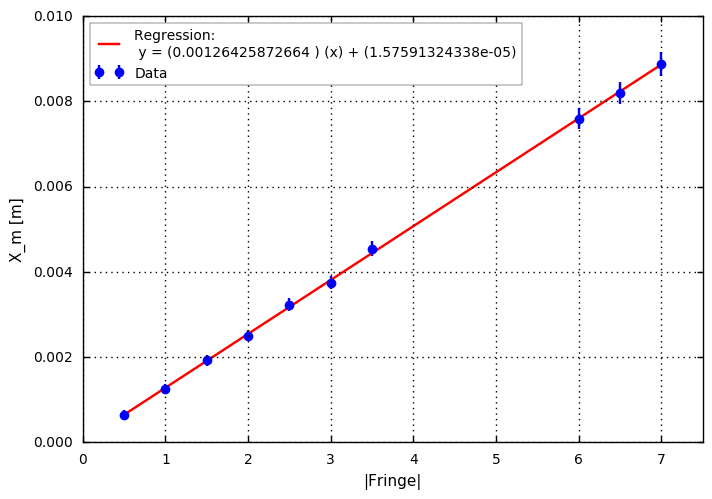

In [6]:
plt.clf()
DS_intensity = np.genfromtxt(main_dir+"A0150CH1.CSV", 
                             delimiter=',', usecols=(0))

time_range = np.arange(0, len(DS_intensity)*0.01, 0.01)

    ## --- Min/Max Locations
#loc = ([1.47874, 2.3745, 8.06192, 9.50407, 10.4396, 11.8096, 12.8659,
#        14.115, 15.2598, 16.4589, 17.6698, 18.827, 20.0799, 21.1979, 
#        22.5546, 23.5305, 25.1103, 30.8524, 32.2111, 33.2891, 34.5241])


#for z in range(len(loc)):
#    plt.axvline(x=loc[z], color='b', label="Max/Min" if z==0 else "")
    
plt.plot(time_range, DS_intensity, 'r', label="Trace")
plt.title("Double Slit: Apparent Intensity vs. Time [s]")
plt.ylabel("Relative Intensity")
plt.xlabel("Time [s]")
plt.style.use('seaborn-notebook')
plt.grid()
plt.xlim(0,40)
plt.legend()
plt.show()

    ## --- Linear Regression Section
plt.clf()
    
    ## --- Loading Mins and Maxs
raw_data = np.genfromtxt(main_dir+"DS_max_2.txt", delimiter=',')

mag = raw_data[:,0]
time = raw_data[:,1]
y_DS = time * v
d_y_DS = np.sqrt((v*delta_t)**2+(time*d_v)**2)
dt = raw_data[:,2]

    ## --- Fit the Linear Regression and Produce Error

fit = np.polyfit(mag, time*v, w=1.0/dt, deg=1, full=False)
b = fit[0]
a = fit[1]

#a,b,cov_00,cov_11,cov_01,chi2 = wlinear_fit(mag, time*v , 1.0/(dt/10.0)**2)
plt.plot(mag, (b*mag)+a, color='red',
             label="Regression: \n y = ("+str(b)+" ) (x) + ("+str(a)+")")
plt.errorbar(mag, y_DS, yerr=d_y_DS, fmt="o", label="Data")

plt.style.use('seaborn-notebook')

plt.ylabel("X_m [m]")
plt.xlabel("|Fringe|")
plt.xlim(0.0, 7.5)
plt.grid()

plt.legend(loc=2)

## --- Print Linear regression equation and errors
#print("y = ("+str(b)+" +/- "+str(0.0075883397)+" ) (x) + ("
#      +str(a)+" +/- "+str(np.sqrt(cov_00))+")")

#b = 0.126/100.0

slit_sep = wavelength * L_DS / b
d_slit_sep = slit_sep_err(wavelength, L_DS, dL_DS, b, 0.000075)

## --- Print Slit separation, d
##print("Slits are %s [m] apart +/- %s, approx. %s +/- %s[mm]")%(slit_sep,
                                                        #d_slit_sep,
                                                      # slit_sep*1000,
                                                      # d_slit_sep*1000)
print("Separation, d, approx. %s +/- %s[mm]")%(slit_sep*1000.0, d_slit_sep*1000.0)
## --- Compare

sigma_diff = (slit_sep*1000.0 - d_theo)/(d_slit_sep*1000.0)

print("Approximately %s \sigma away from theory.") %(sigma_diff)

## Remeasure mag = +/- 4

In [256]:
632e-9 / (0.2/1000)

0.00316